In [1]:
# To get rid of those blocks of red warnings
import warnings
warnings.filterwarnings("ignore")

# Standard Imports
import numpy as np
from scipy import stats
import pandas as pd
from math import sqrt
import os

# Vis Imports
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Modeling Imports
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression, RFE

# Custom Module Imports
import env
import wrangle_zillow

In [2]:
df, train, validate, test = wrangle_zillow.wrangle_zillow()

In [58]:
df.head().T

,0,2,5,7,9
id,1727539,11677,870991,1639362,43675
parcelid,14297519,14186244,12069064,11104527,17110996
bathrooms,3.5,2.0,1.0,3.0,2.5
bedrooms,4.0,3.0,2.0,4.0,3.0
square_feet,3100.0,1243.0,738.0,2540.0,1371.0
fips,6059.0,6059.0,6037.0,6037.0,6111.0
full_bathroom,3.0,2.0,1.0,3.0,2.0
latitude,33.634931,33.886168,34.149214,34.434971,34.238229
longitude,-117.869207,-117.82317,-118.239357,-118.46439,-119.170633
lot_square_feet,4506.0,8432.0,4214.0,10384.0,3445.0


In [5]:
df.columns

Index(['id', 'parcelid', 'bathrooms', 'bedrooms', 'square_feet', 'fips',
       'full_bathroom', 'latitude', 'longitude', 'lot_square_feet',
       'propertycountylandusecode', 'propertylandusetypeid',
       'rawcensustractandblock', 'region_city', 'region_county', 'region_zip',
       'roomcnt', 'year_built', 'tax_value', 'assessmentyear',
       'censustractandblock', 'logerror', 'transaction_date', 'decade',
       'fips_str', 'house_size', 'house_size_large', 'house_size_medium',
       'house_size_small'],
      dtype='object')

### Sourcing the Zillow database as the data source, create a jupyter notebook named explore_zillow and do the following:

- Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

- Answer those questions through a mix of statistical tests and visualizations.

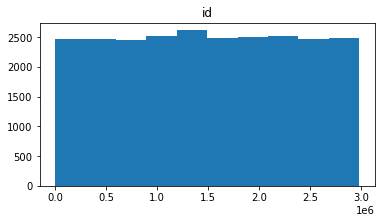

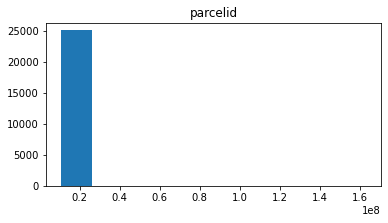

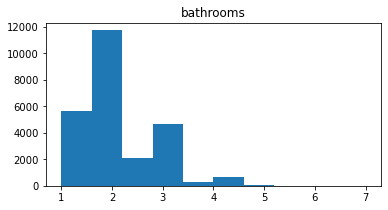

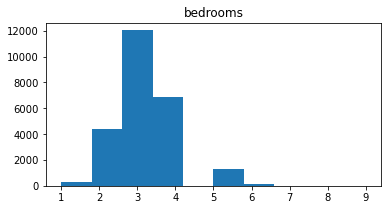

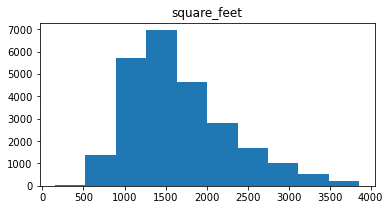

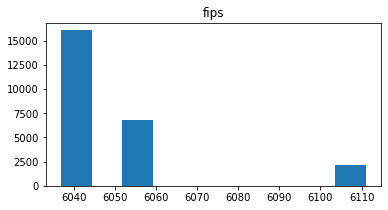

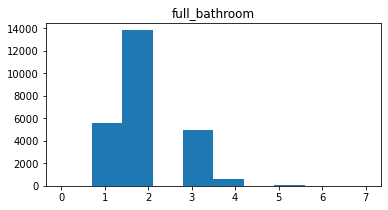

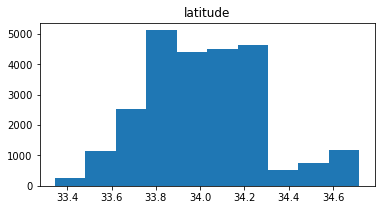

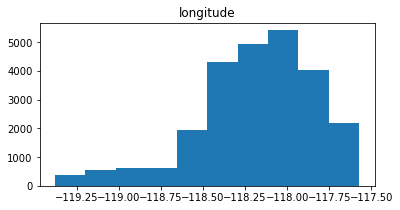

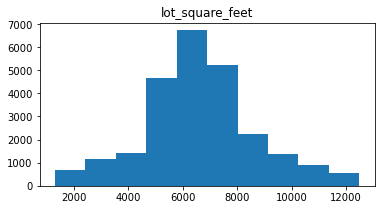

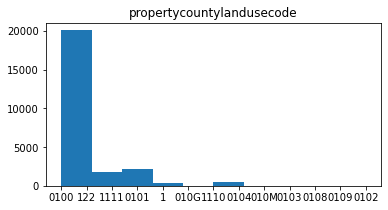

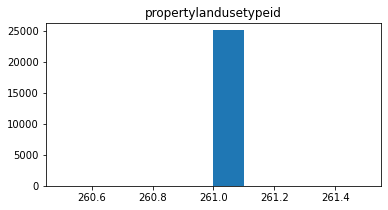

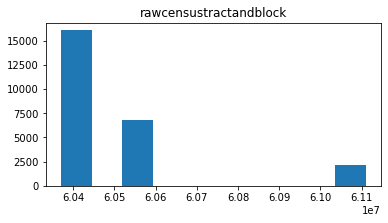

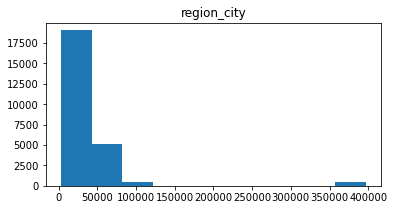

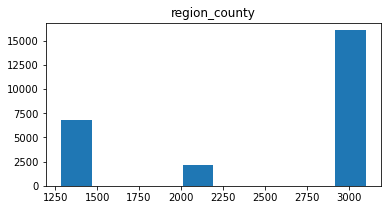

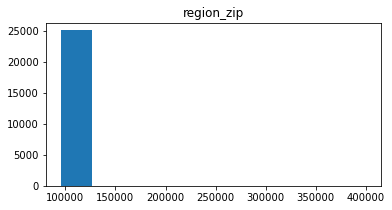

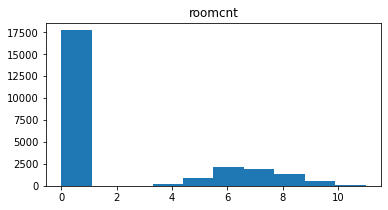

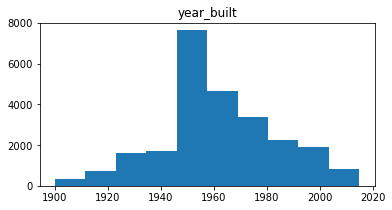

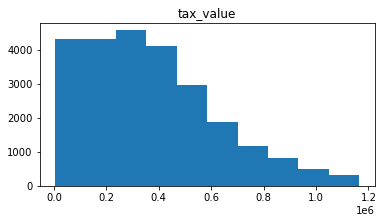

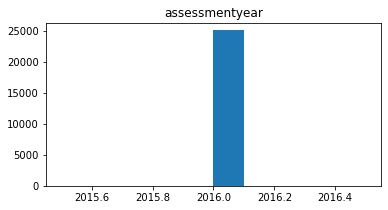

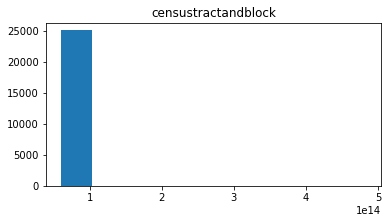

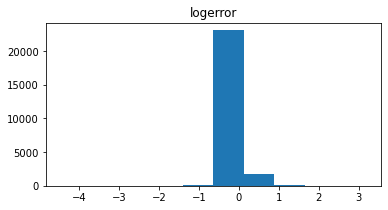

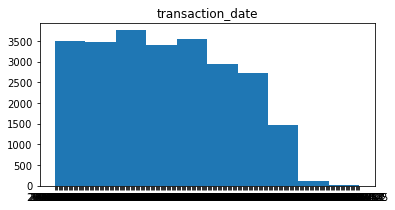

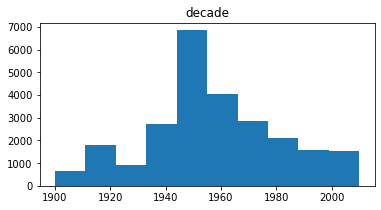

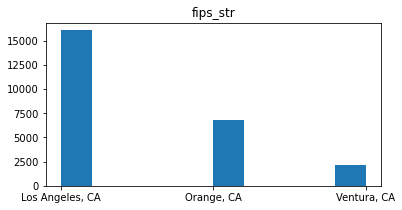

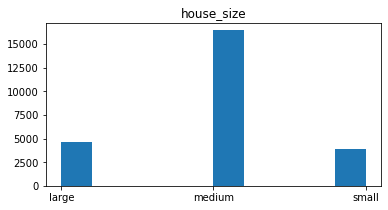

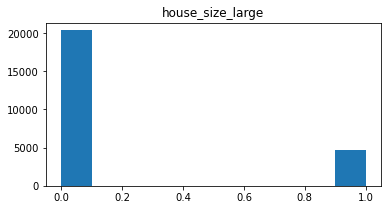

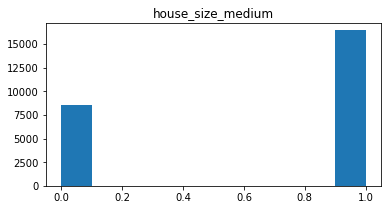

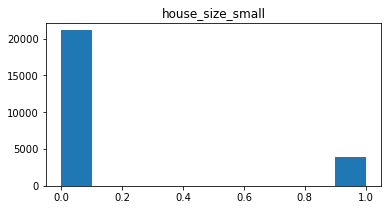

In [6]:
for col in train.columns:
    plt.figure(figsize=(6,3))
    plt.hist(train[col])
    plt.title(col)
    plt.show()

### Is log error significantly different for properties with medium house sizes? (ttest two sample two tailed)

Null - Mean of logerror of houses that are medium size is == Mean of logerror that isn't medium size

Alt - Mean of logerror of houses that are medium size is != Mean of logerror that isn't medium size

<AxesSubplot:xlabel='house_size_medium', ylabel='logerror'>

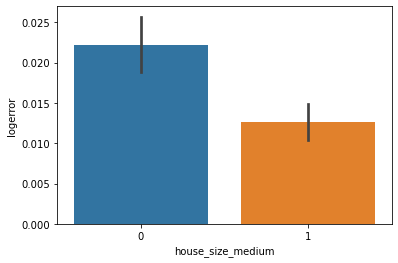

In [8]:
sns.barplot(x='house_size_medium', y='logerror', data=train)

In [25]:
print((train[train.house_size_medium == 1].logerror).var())
print((train[train.house_size_medium == 0].logerror).var())

0.024053307969155502
0.027735736590961447


In [26]:
# Null = var
# Alt != var
# alpha = 0.05
#stats.levene
stats.levene(train[train.house_size_medium == 1].logerror,
             train[train.house_size_medium == 0].logerror,)

LeveneResult(statistic=20.417833571502605, pvalue=6.253189255614584e-06)

In [29]:
#stats.ttest_ind
t, p = stats.ttest_ind(train[train.house_size_medium == 1].logerror, 
                       train[train.house_size_medium == 0].logerror, equal_var=False)
t, p

(-4.45209475487264, 8.55983723089052e-06)

In [42]:
alpha = 0.05
if p > alpha:
    print("We fail to reject $H_{0}$")
# elif t < 0:
#     print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")
    
print("Alt - Mean of logerror of houses that are medium size is != Mean of logerror that isn't medium size")

We reject $H_{0}$
Alt - Mean of logerror of houses that are medium size is != Mean of logerror that isn't medium size


### Is there a relationship between logerror and square feet? (spearmanr)


Null: there is no linear correlation between logerror and square_feet

Alt: there is linear correlation between logerror and square_feet

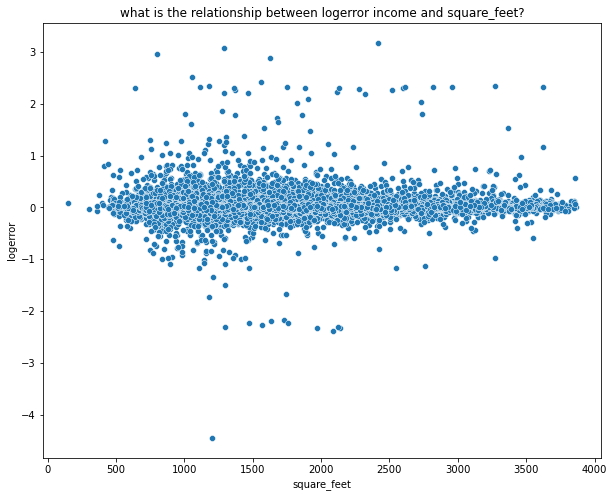

In [41]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=train, x='square_feet', y='logerror', palette="icefire")
plt.title('what is the relationship between logerror income and square_feet?')
plt.show()

In [19]:
#stats.spearmanr()
stats.spearmanr(train.square_feet, train.logerror)

SpearmanrResult(correlation=0.04985560505358278, pvalue=3.0435134749753952e-15)

In [21]:
alpha = 0.05
if p > alpha:
    print("We fail to reject Null")
else:
    print("We reject Null")

We reject Null


### Is there a relationship between decade and house size? (chi2)

In [22]:
alpha = 0.05
null_hyp = 'The decade built and house size are independent'
alt_hyp = 'There is a relationship between decade built and house size'
observed = pd.crosstab(train.decade, train.house_size)
chi2, p, degf, expected = stats.chi2_contingency(observed)
if p < alpha:
    print('We reject the null hypothesis that', null_hyp)
    print(alt_hyp)
else:
    print('We fail to reject the null hypothesis that', null_hyp)
    print('There appears to be no relationship between decade built and house size')
    

We reject the null hypothesis that The decade built and house size are independent
There is a relationship between decade built and house size


### Is there a relationship between logerror and  tax value? (spearmanr)

Null: there is no linear correlation between logerror and tax value

Alt: there is linear correlation between logerror and tax value

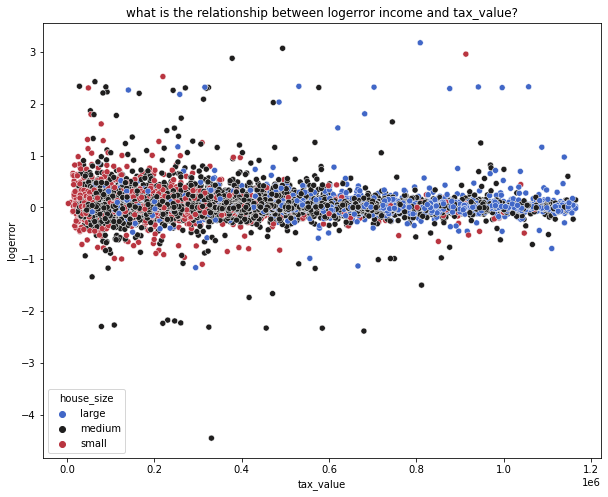

In [53]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=train, x='tax_value', y='logerror', palette="icefire", hue='house_size')
plt.title('what is the relationship between logerror income and tax_value?')
plt.show()

In [48]:
#stats.spearmanr()
stats.spearmanr(train.tax_value, train.logerror)

SpearmanrResult(correlation=-0.017322175094739052, pvalue=0.00615238313274496)

In [49]:
alpha = 0.05
if p > alpha:
    print("We fail to reject Null")
else:
    print("We reject Null")

We reject Null


____

In [57]:
train.columns

Index(['id', 'parcelid', 'bathrooms', 'bedrooms', 'square_feet', 'fips',
       'full_bathroom', 'latitude', 'longitude', 'lot_square_feet',
       'propertycountylandusecode', 'propertylandusetypeid',
       'rawcensustractandblock', 'region_city', 'region_county', 'region_zip',
       'roomcnt', 'year_built', 'tax_value', 'assessmentyear',
       'censustractandblock', 'logerror', 'transaction_date', 'decade',
       'fips_str', 'house_size', 'house_size_large', 'house_size_medium',
       'house_size_small'],
      dtype='object')

year_built
1955.0    1031
1950.0     837
1954.0     831
1953.0     816
1956.0     710
          ... 
1903.0      13
1904.0       9
1901.0       8
1902.0       6
1900.0       4
Name: year_built, Length: 116, dtype: int64
1955.0    4.122186
1950.0    3.346528
1954.0    3.322538
1953.0    3.262564
1956.0    2.838751
            ...   
1903.0    0.051977
1904.0    0.035984
1901.0    0.031986
1902.0    0.023989
1900.0    0.015993
Name: year_built, Length: 116, dtype: float64


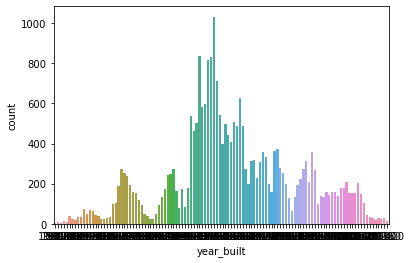

fips
6037.0    16047
6059.0     6825
6111.0     2139
Name: fips, dtype: int64
6037.0    64.159770
6059.0    27.287993
6111.0     8.552237
Name: fips, dtype: float64


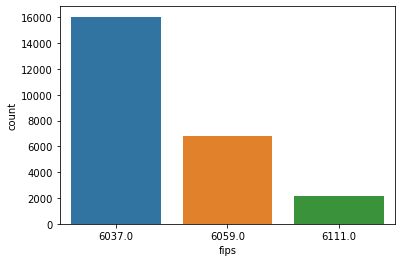

region_zip
97319.0     384
97318.0     332
97328.0     297
96987.0     251
97329.0     250
           ... 
96148.0       1
96207.0       1
96323.0       1
399675.0      1
96001.0       1
Name: region_zip, Length: 368, dtype: int64
97319.0     1.535324
97318.0     1.327416
97328.0     1.187478
96987.0     1.003558
97329.0     0.999560
              ...   
96148.0     0.003998
96207.0     0.003998
96323.0     0.003998
399675.0    0.003998
96001.0     0.003998
Name: region_zip, Length: 368, dtype: float64


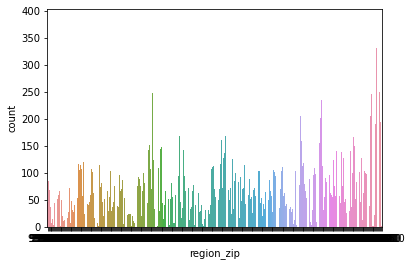

decade
1950    6843
1960    4056
1970    2849
1940    2711
1980    2094
1920    1784
1990    1580
2000    1385
1930     927
1910     447
1900     188
2010     147
Name: decade, dtype: int64
1950    27.359962
1960    16.216865
1970    11.390988
1940    10.839231
1980     8.372316
1920     7.132862
1990     6.317220
2000     5.537563
1930     3.706369
1910     1.787214
1900     0.751669
2010     0.587741
Name: decade, dtype: float64


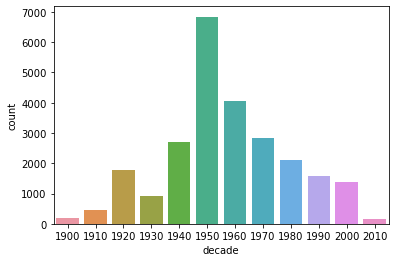

house_size
medium    16422
large      4678
small      3911
Name: house_size, dtype: int64
medium    65.65911
large     18.70377
small     15.63712
Name: house_size, dtype: float64


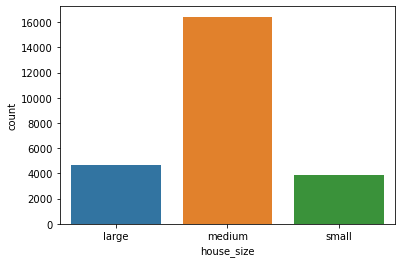

propertycountylandusecode
0100    13614
122      6449
0101     2232
1111     1816
1         376
1110      323
0104      140
010M       23
0108       13
010G       10
0103       10
0109        4
0102        1
Name: propertycountylandusecode, dtype: int64
0100    54.432050
122     25.784655
0101     8.924073
1111     7.260805
1        1.503339
1110     1.291432
0104     0.559754
010M     0.091960
0108     0.051977
010G     0.039982
0103     0.039982
0109     0.015993
0102     0.003998
Name: propertycountylandusecode, dtype: float64


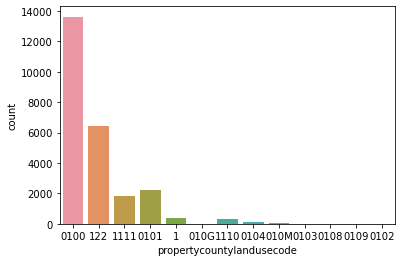

propertylandusetypeid
261.0    25011
Name: propertylandusetypeid, dtype: int64
261.0    100.0
Name: propertylandusetypeid, dtype: float64


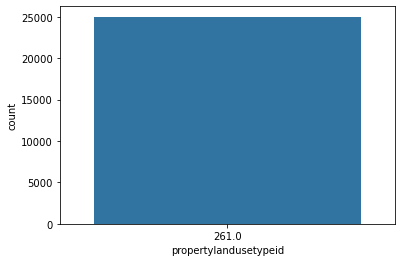

rawcensustractandblock
6.037920e+07    15
6.059042e+07    13
6.059032e+07    12
6.059032e+07    12
6.059022e+07    11
                ..
6.059042e+07     1
6.037129e+07     1
6.037602e+07     1
6.037108e+07     1
6.037554e+07     1
Name: rawcensustractandblock, Length: 18461, dtype: int64
6.037920e+07    0.059974
6.059042e+07    0.051977
6.059032e+07    0.047979
6.059032e+07    0.047979
6.059022e+07    0.043981
                  ...   
6.059042e+07    0.003998
6.037129e+07    0.003998
6.037602e+07    0.003998
6.037108e+07    0.003998
6.037554e+07    0.003998
Name: rawcensustractandblock, Length: 18461, dtype: float64


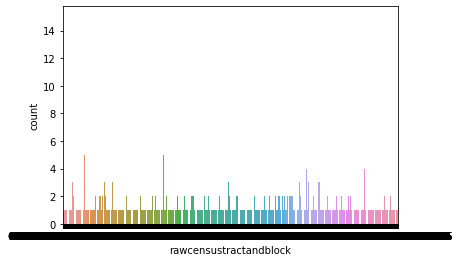

region_city
12447.0    5234
5534.0      906
46298.0     803
40227.0     742
16764.0     582
           ... 
25271.0       2
34037.0       1
32927.0       1
3491.0        1
53162.0       1
Name: region_city, Length: 166, dtype: int64
12447.0    20.926792
5534.0      3.622406
46298.0     3.210587
40227.0     2.966695
16764.0     2.326976
             ...    
25271.0     0.007996
34037.0     0.003998
32927.0     0.003998
3491.0      0.003998
53162.0     0.003998
Name: region_city, Length: 166, dtype: float64


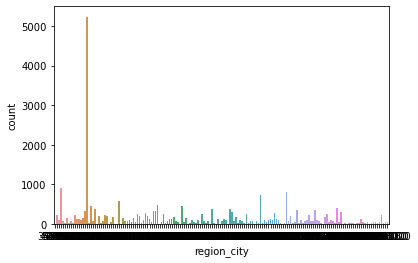

region_county
3101.0    16047
1286.0     6825
2061.0     2139
Name: region_county, dtype: int64
3101.0    64.159770
1286.0    27.287993
2061.0     8.552237
Name: region_county, dtype: float64


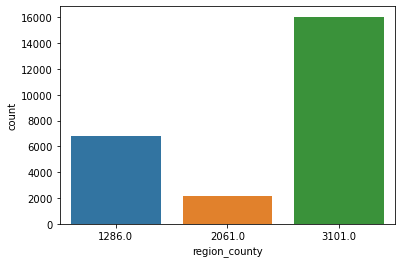

censustractandblock
6.037920e+13    15
6.059032e+13    13
6.059042e+13    13
6.059032e+13    12
6.059032e+13    12
                ..
6.037108e+13     1
6.111003e+13     1
6.037481e+13     1
6.059087e+13     1
6.037554e+13     1
Name: censustractandblock, Length: 18471, dtype: int64
6.037920e+13    0.059974
6.059032e+13    0.051977
6.059042e+13    0.051977
6.059032e+13    0.047979
6.059032e+13    0.047979
                  ...   
6.037108e+13    0.003998
6.111003e+13    0.003998
6.037481e+13    0.003998
6.059087e+13    0.003998
6.037554e+13    0.003998
Name: censustractandblock, Length: 18471, dtype: float64


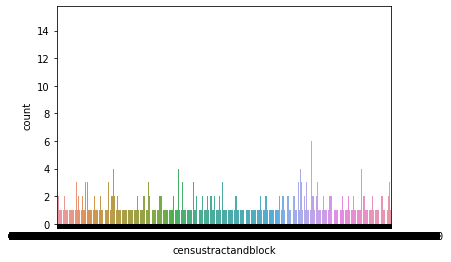

transaction_date
2017-06-30    392
2017-04-28    272
2017-05-31    268
2017-08-31    251
2017-07-28    248
             ... 
2017-07-01      1
2017-06-11      1
2017-01-28      1
2017-02-19      1
2017-03-25      1
Name: transaction_date, Length: 246, dtype: int64
2017-06-30    1.567310
2017-04-28    1.087521
2017-05-31    1.071529
2017-08-31    1.003558
2017-07-28    0.991564
                ...   
2017-07-01    0.003998
2017-06-11    0.003998
2017-01-28    0.003998
2017-02-19    0.003998
2017-03-25    0.003998
Name: transaction_date, Length: 246, dtype: float64


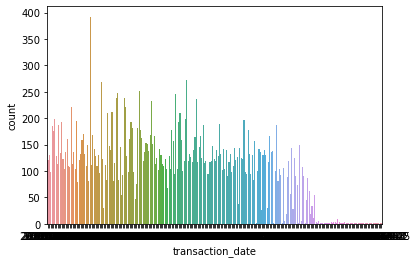

In [61]:
num_vars = ['bedrooms', 'bathrooms', 'square_feet', 'tax_value', 'lot_square_feet', 'full_bathroom', 'logerror']
cat_vars = ['year_built', 'fips', 'region_zip', 'decade', 'house_size', 'propertycountylandusecode', 'propertylandusetypeid', 'rawcensustractandblock'
           ,'region_city', 'region_county', 'censustractandblock', 'transaction_date']

for col in cat_vars:
    print(col)
    print(train[col].value_counts())
    print(train[col].value_counts(normalize=True)*100)
    sns.countplot(x=col, data=train)
    plt.show()

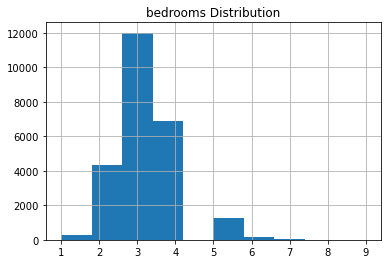

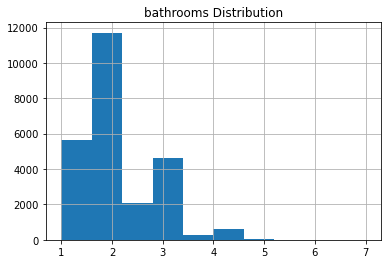

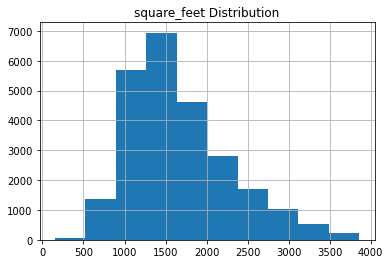

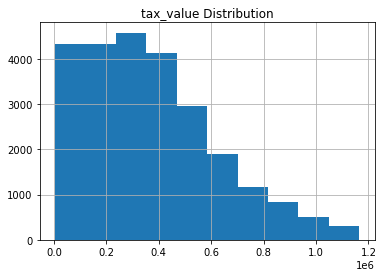

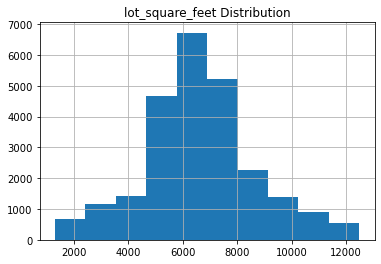

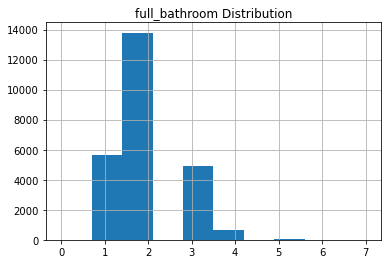

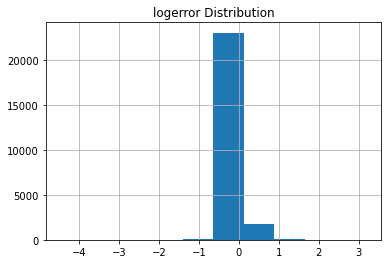

In [62]:
for col in num_vars:
    train[col].hist()
    plt.title(col+' Distribution')
    plt.show()